<a href="https://colab.research.google.com/github/issacridhin/Reinforcement_learning/blob/main/2348546_Lab8_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implement a basic TD(0) algorithm for a simple environment where an agent moves through a 1D grid of 5 states (numbered 1 to 5).**

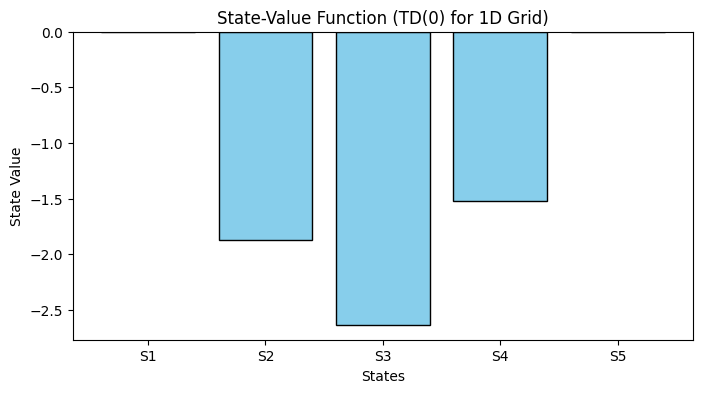

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the 1D grid environment
class OneDGrid:
    def __init__(self, size=5, terminal_states=[0, 4]):
        self.size = size
        self.terminal_states = terminal_states
        self.reset()

    def reset(self):
        self.agent_position = 2  # Start in the middle state
        return self.agent_position

    def step(self, action):
        if action == "left":
            new_position = self.agent_position - 1
        elif action == "right":
            new_position = self.agent_position + 1
        else:
            raise ValueError("Invalid action. Choose 'left' or 'right'.")

        # Ensure new position is within bounds
        new_position = max(0, min(self.size - 1, new_position))
        self.agent_position = new_position

        # Check if terminal state
        if self.agent_position in self.terminal_states:
            return self.agent_position, 0, True  # Terminal state, no reward

        return self.agent_position, -1, False  # Step cost of -1

# TD(0) Implementation
def td_0_1d(grid, alpha=0.1, gamma=0.9, episodes=500):
    size = grid.size
    state_values = np.zeros(size)  # Initialize state values to 0
    for episode in range(episodes):
        state = grid.reset()
        done = False
        while not done:
            # Choose an action randomly
            action = np.random.choice(["left", "right"])
            next_state, reward, done = grid.step(action)

            # Update the value of the current state using bootstrapping
            state_values[state] += alpha * (
                reward + gamma * state_values[next_state] - state_values[state]
            )
            state = next_state
    return state_values

# Initialize environment and run TD(0)
grid = OneDGrid()
state_values = td_0_1d(grid)

# Plot the state-value function
plt.figure(figsize=(8, 4))
plt.bar(range(len(state_values)), state_values, color="skyblue", edgecolor="black")
plt.xlabel("States")
plt.ylabel("State Value")
plt.title("State-Value Function (TD(0) for 1D Grid)")
plt.xticks(range(grid.size), labels=[f"S{i+1}" for i in range(grid.size)])
plt.show()


#Inference:

1. Environment: The agent moves within a 1D grid of 5 states. Terminal states are the first (S1) and last (S5​) states, with no reward upon reaching them.Non-terminal states incur a step cost of −1.

2. TD(0) Algorithm:
The state-value V(s) is updated using the Temporal Difference formula:

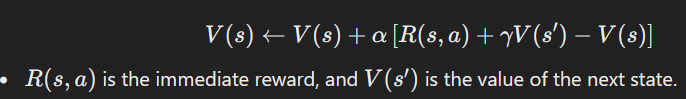

3. Visualization:
The state-value function is plotted as a bar chart, showing the learned value of each state after 500 episodes.